In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [4]:
df = pd.read_csv("A2_data.csv")

In [ ]:
df.head()

,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,56064,-0.001584,854,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,53727,-0.824700,3292,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,54883,-0.418000,5888,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,51783,5.953000,536,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,56069,0.846000,9427,GALAXY


In [ ]:
df.describe()

,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,186.130520,55588.647500,0.001379,5137.009660
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,149.011073,1808.484233,3.002674,2952.303351
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,11.000000,51608.000000,-12.160000,266.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,82.000000,54234.000000,-2.027000,2526.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,146.000000,55868.500000,0.012360,4987.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,241.000000,56777.000000,2.040000,7400.250000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,989.000000,58932.000000,14.160000,12547.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   field_ID  100000 non-null  int64  
 8   MJD       100000 non-null  int64  
 9   redshift  100000 non-null  float64
 10  plate     100000 non-null  int64  
 11  class     100000 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 9.2+ MB


In [ ]:
df.nunique().to_frame().transpose()

,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate,class
0,99997,99999,93748,92651,91901,92019,92007,856,2180,14815,6284,3


In [ ]:
quantity_class = df['class'].value_counts().to_frame().rename(index=str, columns={'class': 'Class'})
quantity_class

,Class
GALAXY,59445
STAR,21594
QSO,18961


In [ ]:
df.corr()

,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.165577,0.000634,-0.001228,0.001999
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.173416,-0.000938,0.001698,0.002457
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,-0.008374,-0.004645,-0.002403,-0.002822
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,-0.008852,-0.004627,-0.002257,-0.002795
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,-0.026423,-0.002510,-0.003902,0.003585
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,-0.026679,-0.002903,-0.002692,0.005744
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,-0.008903,-0.004615,-0.001959,-0.002529
field_ID,-0.165577,-0.173416,-0.008374,-0.008852,-0.026423,-0.026679,-0.008903,1.000000,-0.004442,0.003915,0.001889
MJD,0.000634,-0.000938,-0.004645,-0.004627,-0.002510,-0.002903,-0.004615,-0.004442,1.000000,-0.002761,0.001825
redshift,-0.001228,0.001698,-0.002403,-0.002257,-0.003902,-0.002692,-0.001959,0.003915,-0.002761,1.000000,-0.001251


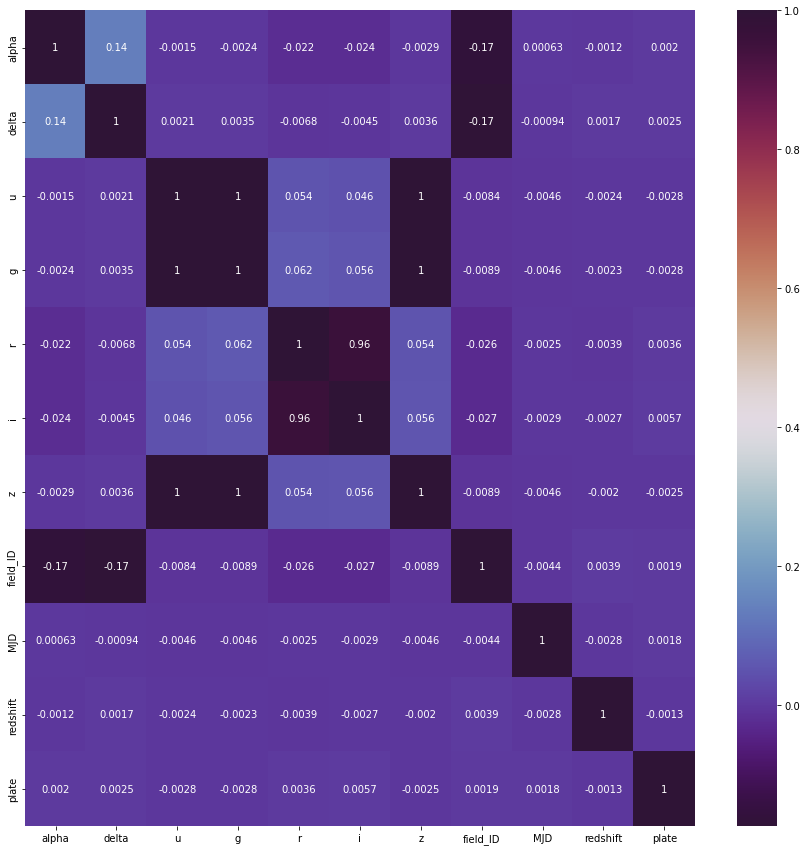

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='twilight_shifted')

In [5]:
features = df.drop(['class','field_ID'], axis=1)
labels =df['class']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

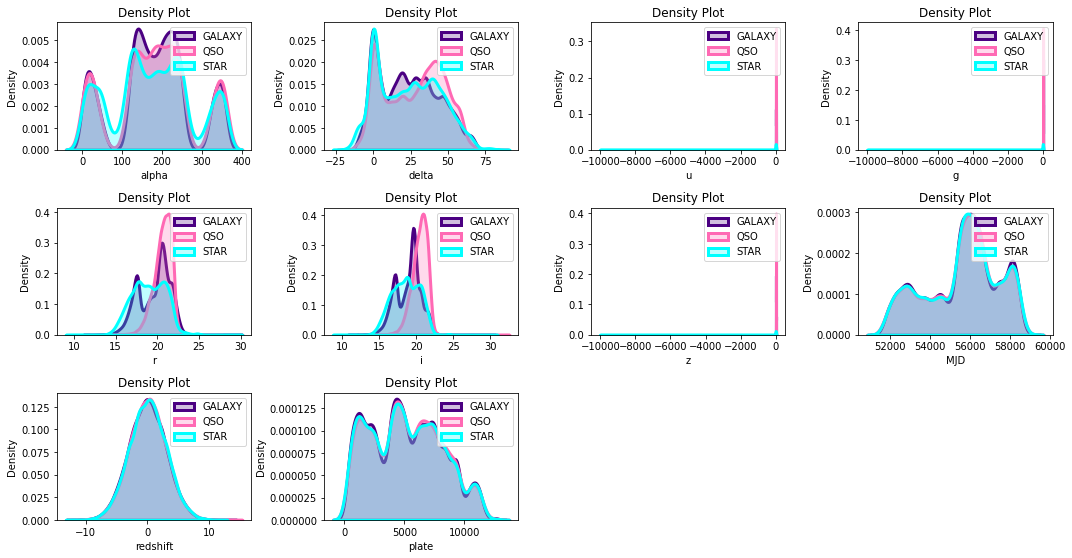

In [ ]:
#How they are distributed
featurecols = list(features)
astrObjs = df['class'].unique()
colours = ['indigo', '#FF69B4', 'cyan']
plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(4, 4, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(df[df['class']==astrObjs[j]][featurecols[i]], hist = False, kde = True, color = colours[j], kde_kws = {'shade': True, 'linewidth': 3}, label = astrObjs[j])
    plt.legend()
    plt.title('Density Plot')
    plt.xlabel(featurecols[i])
    plt.ylabel('Density')
plt.tight_layout()

Random Forest Classifier

In [6]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=123, stratify=labels)
clf = RandomForestClassifier()

In [7]:
#scale the data to speed up Random Forest
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

Hyperparameter Optimisation

In [ ]:
#Parameters of RandomForest
pprint(clf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#tuning using Random Search
hyperparameters = {'max_features':[None, 'auto', 'sqrt', 'log2'],
                   'max_depth':[None, 1, 5, 10, 15, 20],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                   'criterion': ['gini', 'entropy']}
rf_random = RandomizedSearchCV(clf, hyperparameters, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
rf_random.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 5, 10, 15, 20],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=123, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy'}

Training the RandomForest

In [6]:
clf.set_params(criterion = 'entropy', max_features = None, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 80)

RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=80)

Cross Validation Score

In [ ]:
#Best Parameters
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(clf,features,labels,cv = 5,scoring = "accuracy")
print(f' Scores for each fold are: {cross_score}')
print(f' Average score: {"{:.2f}".format(cross_score.mean())}')

 Scores for each fold are: [0.8644  0.87675 0.8712  0.87145 0.86445]
 Average score: 0.87


In [ ]:
#Experiment 1
clf.set_params(criterion = 'entropy', max_features = None, max_depth = 14, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 80)

cross_score = cross_val_score(clf,features,labels,cv = 5,scoring = "accuracy")
print(f' Scores for each fold are: {cross_score}')
print(f' Average score: {"{:.2f}".format(cross_score.mean())}')

 Scores for each fold are: [0.85685 0.86685 0.864   0.8627  0.8552 ]
 Average score: 0.86


In [9]:
#Experiment 2
clf.set_params(criterion = 'entropy', max_features = None, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)

cross_score = cross_val_score(clf,features,labels,cv = 5,scoring = "accuracy")
print(f' Scores for each fold are: {cross_score}')
print(f' Average score: {"{:.2f}".format(cross_score.mean())}')

 Scores for each fold are: [0.8655  0.87685 0.87135 0.8709  0.8643 ]
 Average score: 0.87


Test and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_


In [ ]:
print('features importances are : ' , clf.feature_importances_)

features importances are :  [0.05381849 0.05150391 0.12282834 0.22402222 0.10281045 0.05774338
 0.29438299 0.03106577 0.03069203 0.03113244]


<BarContainer object of 10 artists>

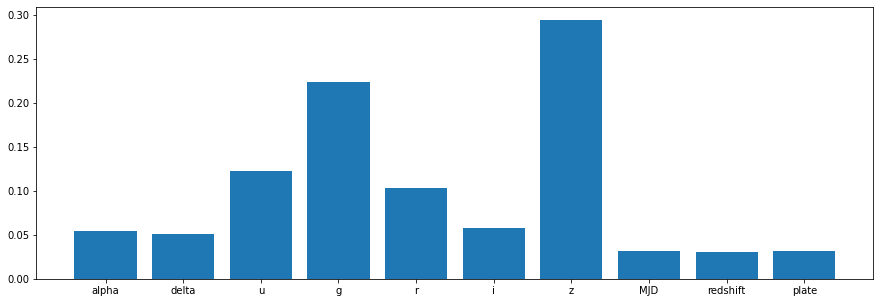

In [ ]:
#Visualize feature importance
key=features.keys()
plt.figure(figsize=(15,5))
plt.bar(key,clf.feature_importances_)

Classification report and confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

      GALAXY       0.91      0.94      0.93     17834
         QSO       0.80      0.80      0.80      5688
        STAR       0.82      0.75      0.78      6478

    accuracy                           0.87     30000
   macro avg       0.85      0.83      0.84     30000
weighted avg       0.87      0.87      0.87     30000

[[16848   498   488]
 [  608  4535   545]
 [ 1012   616  4850]]


Visualization of Confusion Matrix

Text(27.499999999999996, 0.5, 'True')

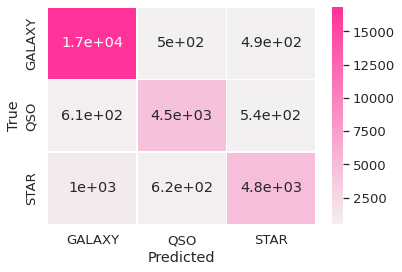

In [ ]:
cm = pd.DataFrame(cm, index=sortedlabels, columns=sortedlabels)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')